In [2]:
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import sklearn
import nltk
import plotly.express as px

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import RegexpStemmer
from nltk.stem import SnowballStemmer

In [3]:
vad = pd.read_csv("VAD_Dataframe.csv", index_col = 0)
data = pd.read_csv("Data.csv", index_col = 0)
# print(vad.head())
#print(data.head())
print(data.iloc[1])
test = data.iloc[1]

clean_stems    joy guide alway com when we are too attached o...
clean_tweet    joy guides always come attached need ask guide...
ijoy                                                           1
Name: 5883, dtype: object


In [4]:
#Create a function that takes in a sentence string and computes the total valence, arousal, dominance scores
#Will lso need to make sure we know if this is a joy tweet or not (keep track of ijoy)
#Return a dictionary of these total scores

#print(test['clean_stems'])
porter = PorterStemmer()
lancaster=LancasterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
regexp = RegexpStemmer('ing$|s$|e$|able$', min=4)
snowball = SnowballStemmer("english")
tokenizer = nltk.RegexpTokenizer(r"\w+")
words_st = tokenizer.tokenize(test['clean_stems'])
words = tokenizer.tokenize(test['clean_tweet'])
stems = []
for word in words:
  stems.append([word, porter.stem(word), lancaster.stem(word), regexp.stem(word), snowball.stem(word), wordnet_lemmatizer.lemmatize(word, pos='v')])


#vad_words = tokenizer.tokenize(vad['Term'])
print(words_st)
print(words)

df_stems = pd.DataFrame(stems, columns=['Word', 'Porter', 'Lancaster', 'RegExp', 'Snowball', 'Lemma'])
df_stems

['joy', 'guide', 'alway', 'com', 'when', 'we', 'are', 'too', 'attached', 'or', 'need', 'a', 'ask', 'your', 'guide', 'by', 'sonia', 'choquett', 'for', 'mor']
['joy', 'guides', 'always', 'come', 'attached', 'need', 'ask', 'guides', 'sonia', 'choquette']


Word    Porter Lancaster    RegExp  Snowball      Lemma
0        joy       joy       joy       joy       joy        joy
1     guides      guid      guid     guide      guid      guide
2     always     alway     alway     alway     alway     always
3       come      come       com       com      come       come
4   attached    attach    attach  attached    attach     attach
5       need      need       nee      need      need       need
6        ask       ask       ask       ask       ask        ask
7     guides      guid      guid     guide      guid      guide
8      sonia     sonia       son     sonia     sonia      sonia
9  choquette  choquett   choquet  choquett  choquett  choquette

In [12]:
#Function to get the total of Valence Arousal Dominance
def vad_totals(words):
    v, a, d = 0, 0,0
    i = 0
    counter = 0
    words = tokenizer.tokenize(words)
    while i < len(words):
        j = 0
        words[i] = wordnet_lemmatizer.lemmatize(words[i], pos='v')
        while j < len(vad['Term']):         
            if words[i] == vad['Term'][j]:
                counter +=1
                #print(vad.iloc[j])
                x = vad.iloc[j]
                v = v+x[1]
                a = v+x[2]
                d = v+x[3]
            j = j+1
        i +=1
    if counter == 0:
        counter +=1
    return(v/counter, a/counter, d/counter) 

In [6]:
#Note the difference between clean_tweet and the stems. Always changes to alway (but niether in VAD)    
#come changes to com - so this one is not counted
#however, guides changes to guide and then it is counted - significant score difference between the two 
print(vad_totals(test['clean_tweet']))
print(vad_totals(test['clean_stems']))



(0.6351428571428572, 0.6801428571428573, 0.7237142857142859)
(0.622875, 0.66225, 0.700375)


In [13]:
vad_totals(dat[349])

(0.0, 0.0, 0.0)

In [14]:
#Fix Function and loop over enitire data
#vad_scores = []
i = 349
dat = list(data["clean_tweet"])
l = len(dat)

#print(dat[0])
#vad_scores = []
while i < l:    
    if str(dat[i]) == "nan":
        vad_scores.append([dat[i], 0, 0, 0])
    else:
        x = vad_totals(dat[i])
        vad_scores.append([dat[i], x[0], x[1], x[2]])
    print(i)
    i +=1
    
        

349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598


2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317


3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956


5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595


7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234


8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873


10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10330
10331
10332
10333
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
10346
10347
10348
10349
10350
10351
10352
10353
10354
10355
10356
10357
10358
10359
10360
10361
10362
10363
10364
10365
10366
10367
10368
10369
10370
10371
10372
10373
10374
10375
10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
10389
10390
10391
10392
10393
10394
10395
10396
10397
10398
10399
10400
10401
10402
10403
10404
10405
10406
10407
10408
10409
10410
10411
10412
10413
10414
10415
10416
10417
10418
10419
10420
10421
10422
10423
10424
10425
10426
1042

11627
11628
11629
11630
11631
11632
11633
11634
11635
11636
11637
11638
11639
11640
11641
11642
11643
11644
11645
11646
11647
11648
11649
11650
11651
11652
11653
11654
11655
11656
11657
11658
11659
11660
11661
11662
11663
11664
11665
11666
11667
11668
11669
11670
11671
11672
11673
11674
11675
11676
11677
11678
11679
11680
11681
11682
11683
11684
11685
11686
11687
11688
11689
11690
11691
11692
11693
11694
11695
11696
11697
11698
11699
11700
11701
11702
11703
11704
11705
11706
11707
11708
11709
11710
11711
11712
11713
11714
11715
11716
11717
11718
11719
11720
11721
11722
11723
11724
11725
11726
11727
11728
11729
11730
11731
11732
11733
11734
11735
11736
11737
11738
11739
11740
11741
11742
11743
11744
11745
11746
11747
11748
11749
11750
11751
11752
11753
11754
11755
11756
11757
11758
11759
11760
11761
11762
11763
11764
11765
11766
11767
11768
11769
11770
11771
11772
11773
11774
11775
11776
11777
11778
11779
11780
11781
11782
11783
11784
11785
11786
11787
11788
11789
11790
11791
11792
1179

12994
12995
12996
12997
12998
12999
13000
13001
13002
13003
13004
13005
13006
13007
13008
13009
13010
13011
13012
13013
13014
13015
13016
13017
13018
13019
13020
13021
13022
13023
13024
13025
13026
13027
13028
13029
13030
13031
13032
13033
13034
13035
13036
13037
13038
13039
13040
13041
13042
13043
13044
13045
13046
13047
13048
13049
13050
13051
13052
13053
13054
13055
13056
13057
13058
13059
13060
13061
13062
13063
13064
13065
13066
13067
13068
13069
13070
13071
13072
13073
13074
13075
13076
13077
13078
13079
13080
13081
13082
13083
13084
13085
13086
13087
13088
13089
13090
13091
13092
13093
13094
13095
13096
13097
13098
13099
13100
13101
13102
13103
13104
13105
13106
13107
13108
13109
13110
13111
13112
13113
13114
13115
13116
13117
13118
13119
13120
13121
13122
13123
13124
13125
13126
13127
13128
13129
13130
13131
13132
13133
13134
13135
13136
13137
13138
13139
13140
13141
13142
13143
13144
13145
13146
13147
13148
13149
13150
13151
13152
13153
13154
13155
13156
13157
13158
13159
1316

14360
14361
14362
14363
14364
14365
14366
14367
14368
14369
14370
14371
14372
14373
14374
14375
14376
14377
14378
14379
14380
14381
14382
14383
14384
14385
14386
14387
14388
14389
14390
14391
14392
14393
14394
14395
14396
14397
14398
14399
14400
14401
14402
14403
14404
14405
14406
14407
14408
14409
14410
14411
14412
14413
14414
14415
14416
14417
14418
14419
14420
14421
14422
14423
14424
14425
14426
14427
14428
14429
14430
14431
14432
14433
14434
14435
14436
14437
14438
14439
14440
14441
14442
14443
14444
14445
14446
14447
14448
14449
14450
14451
14452
14453
14454
14455
14456
14457
14458
14459
14460
14461
14462
14463
14464
14465
14466
14467
14468
14469
14470
14471
14472
14473
14474
14475
14476
14477
14478
14479
14480
14481
14482
14483
14484
14485
14486
14487
14488
14489
14490
14491
14492
14493
14494
14495
14496
14497
14498
14499
14500
14501
14502
14503
14504
14505
14506
14507
14508
14509
14510
14511
14512
14513
14514
14515
14516
14517
14518
14519
14520
14521
14522
14523
14524
14525
1452

15726
15727
15728
15729
15730
15731
15732
15733
15734
15735
15736
15737
15738
15739
15740
15741
15742
15743
15744
15745
15746
15747
15748
15749
15750
15751
15752
15753
15754
15755
15756
15757
15758
15759
15760
15761
15762
15763
15764
15765
15766
15767
15768
15769
15770
15771
15772
15773
15774
15775
15776
15777
15778
15779
15780
15781
15782
15783
15784
15785
15786
15787
15788
15789
15790
15791
15792
15793
15794
15795
15796
15797
15798
15799
15800
15801
15802
15803
15804
15805
15806
15807
15808
15809
15810
15811
15812
15813
15814
15815
15816
15817
15818
15819
15820
15821
15822
15823
15824
15825
15826
15827
15828
15829
15830
15831
15832
15833
15834
15835
15836
15837
15838
15839
15840
15841
15842
15843
15844
15845
15846
15847
15848
15849
15850
15851
15852
15853
15854
15855
15856
15857
15858
15859
15860
15861
15862
15863
15864
15865
15866
15867
15868
15869
15870
15871
15872
15873
15874
15875
15876
15877
15878
15879
15880
15881
15882
15883
15884
15885
15886
15887
15888
15889
15890
15891
1589

17092
17093
17094
17095
17096
17097
17098
17099
17100
17101
17102
17103
17104
17105
17106
17107
17108
17109
17110
17111
17112
17113
17114
17115
17116
17117
17118
17119
17120
17121
17122
17123
17124
17125
17126
17127
17128
17129
17130
17131
17132
17133
17134
17135
17136
17137
17138
17139
17140
17141
17142
17143
17144
17145
17146
17147
17148
17149
17150
17151
17152
17153
17154
17155
17156
17157
17158
17159
17160
17161
17162
17163
17164
17165
17166
17167
17168
17169
17170
17171
17172
17173
17174
17175
17176
17177
17178
17179
17180
17181
17182
17183
17184
17185
17186
17187
17188
17189
17190
17191
17192
17193
17194
17195
17196
17197
17198
17199
17200
17201
17202
17203
17204
17205
17206
17207
17208
17209
17210
17211
17212
17213
17214
17215
17216
17217
17218
17219
17220
17221
17222
17223
17224
17225
17226
17227
17228
17229
17230
17231
17232
17233
17234
17235
17236
17237
17238
17239
17240
17241
17242
17243
17244
17245
17246
17247
17248
17249
17250
17251
17252
17253
17254
17255
17256
17257
1725

In [16]:
print(len(vad_scores))

18226


In [12]:
#position 479
#260153,🔥🔥🔥,🔥🔥🔥,0  ---> this is what the tweet looked like in Data.csv
#these tweets were only emojis - probably a comment on someone's tweet
#vad_scores.append(["nan", 0, 0, 0])
print(dat[20])

absolutely joy felt listening watching perform indescribable song beautiful voice like dream✨ blessed song thank jimin💜 2yearswithserendipity


In [23]:
##This is a test until I have the full data
# It is the first 100 tweets in the data (they have joy in them)
#and the last 125 tweets (they do not have joy in them)
df = pd.DataFrame(vad_scores, columns = ["Tweet", "V", "A", "D"])
#print(df.tail())
joy = data['ijoy']
joy = joy.reset_index(drop = True)

#testing first 100 examples
# test = joy[0:100]
# test1 = joy[18100:]
# test = pd.concat([test, test1], axis=0) 
df["Joy"] = joy

# df["Joy"] = df["Joy"].fillna(0)
# df['Joy'] = df['Joy'].replace([1.0],'Joy')
# df['Joy'] = df['Joy'].replace([0.0],'NoJoy')
print(df.tail())
df.to_csv("All-VAD.csv")

                                                   Tweet         V         A  \
18221  pengepandatante coastlieberian nontoxickids si...  0.622125  0.647625   
18222                                          happening  0.677000  1.347000   
18223                 chilling sky 360c observation deck  0.712000  0.795250   
18224                            saw peonies n lost shit  0.143667  0.369667   
18225                              shoot kill muthafucka  0.072000  0.542500   

              D  Joy  
18221  0.655563    0  
18222  1.228000    0  
18223  0.810500    0  
18224  0.241667    0  
18225  0.440000    0  


In [27]:
# perform PCA on the test data
#In essence, it computes a matrix that represents the variation of your data (covariance matrix/eigenvectors)
#and rank them by their relevance (explained variance/eigenvalues)

features = ["V", "A", "D"]
pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(3),
    color=df["Joy"]
)
#The diagonal just shows the PC1 vs. PC1 which is a straight line since they are the same (correlation=1)
fig.update_traces(diagonal_visible=False)
fig.show()

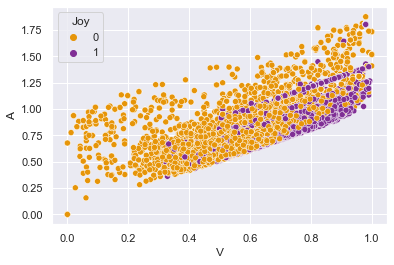

In [25]:
#Other plot
#VAD original scores are from 0 to 1, should we change to -1 to 1?
x, y = pd.Series(df["V"], name="Valence"), pd.Series(df["A"], name="Arousal")
sns.set_theme(color_codes=True)
ax = sns.scatterplot(data = df, x= "V", y="A", marker="o", hue="Joy", palette = "CMRmap_r")
#This graph looks very positively correlated and linear --> is this factual or due to the scale?

In [33]:
#Create copy of data frame to scale the VAD scores
# test_scale = df["V"][4]
# print(test_scale)
# rescaled = -1 + 2 * (test_scale)
# rescaled


df["V"] = -1 + 2 * (df["V"])
df["A"] = -1 + 2 * (df["A"])
df["D"] = -1 + 2 * (df["D"])
print(df.head())


                                               Tweet         V         A  \
0  scenes weekend progress lincolnpark new build ... -4.264000 -0.080571   
1  joy guides always come attached need ask guide... -4.837714 -0.279429   
2  asked anything name ask receive joy completejo... -4.264000  0.343200   
3           things bring joy finding new anime binge -3.989333  0.186000   
4  miss luca much really constant source joy ’ be... -3.376000  0.168667   

          D  Joy  
0 -0.089143    1  
1 -0.105143    1  
2  0.319200    1  
3  0.086000    1  
4  0.406000    1  


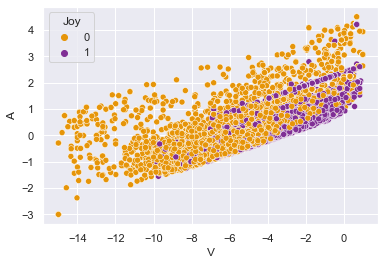

In [35]:
# Same plots as above but with rescaled values

features = ["V", "A", "D"]
pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(3),
    color=df["Joy"]
)
#The diagonal just shows the PC1 vs. PC1 which is a straight line since they are the same (correlation=1)
fig.update_traces(diagonal_visible=False)
fig.show()

##Now make this into 4 quadrants
x, y = pd.Series(df["V"], name="Valence"), pd.Series(df["A"], name="Arousal")
sns.set_theme(color_codes=True)
ax = sns.scatterplot(data = df, x= "V", y="A", marker="o", hue="Joy", palette = "CMRmap_r")
#This graph looks very positively correlated and linear --> is this factual or due to the scale?